In [4]:
import numpy as np
import matplotlib.pyplot as plt
#from Generate_KPATH import*

#main()


Enter fermi energy
2.9624
Enter the title of the band plot
Ti
Enter lower limit of energy window
-10
Enter upper limit of energy window
8


klabel file Not Found


Enter your kpath file name
2


File Not Found!


Choose string form or matrix form for constructing x label. ('s' or 'm')
s
Enter lattice type
H
Enter kpath
GMKdGA


C:\Users\alan\OneDrive\文件\Python_Program\Python_Program\First_Principle\Ti\tools.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kpath_vec != 'd' and kpath_vecs[i-1] != 'd' and i != 0:


Successfully initialize with the file Lattice_Information.txt
Enter the name of the .png file
Try


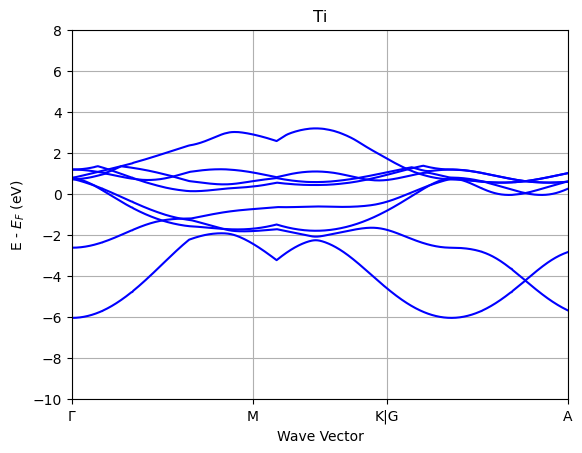

In [2]:
lines, status = read_energy()
E_of_k, status = transform_bands_to_E_of_k(lines) #EF=2.9624
plot_E_of_k(E_of_k)

In [44]:
def main():

    '''
    The main program flow
    '''

    library = init() #Initialize with Lattice_Information.txt
    kpath_matrix, lattice_type, kpath = ask(library) #Get parameters from user
    fraction, number = generate_kpath(kpath_matrix) #Generate kpoints between kpath's high symmetry points
    #write_file(fraction, lattice_type, kpath, number) #Write 3 files: klist_band, KPOINTS and klabel

def init():

    '''
    Initialize the lattice types and the k points library through Lattice_Information.txt
    '''

    file_name = 'Lattice_Information.txt' #Lattice_Information.txt records some lattice types and their k points

    lines = read_file(file_name)
    library = tranform_lines_into_library(file_name, lines)

    return library

def read_file(file_name):

    '''
    A function which reads the Lattice_Information.txt file and return lines
    '''
    
    try:
        with open(file_name, 'r') as fh:
            lines = fh.readlines()

    except:
        sys.stderr.write(f'{file_name} is Not Found')
    
    return lines

def tranform_lines_into_library(file_name, lines):

    '''
    A function which transforms lines into the standard form of library and return library
    '''

    library = {} #collect the information of the lattice types and the k points
    
    for line in lines:

        line = line.split()

        if len(line) == 1: #the length of the line = 1 means the line contains the information of the lattice type
            lattice_type = line[0]
            library[lattice_type] = {}
        elif len(line) == 4: #the length of the line = 4 means the line contains the information of the k point
            high_symmetry_kpoint = line[0]
            library[lattice_type][high_symmetry_kpoint] = np.array(line[1:4], dtype = 'float')
        else:
            print(f'There are some problems in the {file_name} file')

    return library

def ask(library):
    
    lattice_type = ask_lattice_type(library)
    
    kpath_matrix, kpath = ask_kpath(library, lattice_type)
    
    return kpath_matrix, lattice_type, kpath

def ask_lattice_type(library):

    '''
    To ask kpath from user
    '''

    while True:
        
        lattice_type = input(f'Enter the lattice type in the lattice type library {tuple(library.keys())} \n')
        
        if lattice_type in library.keys():
            break
        else:
            print(f'There is no \'{lattice_type}\' lattice type in the lattice type library {tuple(library.keys())}')

    return lattice_type

def ask_kpath(library, lattice_type):

    '''
    The function can collect kpath from user
    '''

    while True:
        
        kpath = input(f'Enter the kpath with the string form \n{tuple(library[lattice_type])}\n')
        kpath_matrix = np.zeros(shape=(len(kpath),3))
        all_correct = True

        for i, k in enumerate(kpath):

            if k in library[lattice_type]:
                kpath_matrix[i] = library[lattice_type][k]
            else:
                all_correct = False
                print(f'{k} doesn\'t exist in {tuple(library[lattice_type].keys())}')
        
        if all_correct == True:
            break

    return kpath_matrix, kpath

def ask_total_kpoints(recommend):
    
    try:
        total_kpoints = int(input(f'Enter total kpoints (Recommened:{recommend}*N+1 where N is integer)\n'))
    except:
        sys.stderr.write('Invalid argumets!\n')
        
    return total_kpoints

def generate_kpath(kpath_matrix):

    kpath_delta = kpath_matrix[1:] - kpath_matrix[0:-1]
    length = np.linalg.norm(kpath_delta, axis = 1)*100
    weight = np.array(np.round(length),dtype='int32')
    gcd = np.gcd.reduce(weight)
    weight //= gcd
    recommend = weight.sum()
    total_kpoints = ask_total_kpoints(recommend)
    
    kpath_delta = (kpath_delta.T/weight).T / ((total_kpoints-1)/recommend)
    print(kpath_delta)
    return


In [47]:
main()

Enter the lattice type in the lattice type library ('S', 'B', 'F', 'H') 
H
Enter the kpath with the string form 
('G', 'A', 'K', 'H', 'M', 'L')
GAKHML
Enter total kpoints (Recommened:151*N+1 where N is integer)
100
[[ 0.          0.          0.03050505]
 [ 0.02259635  0.01129816 -0.01694725]
 [ 0.          0.          0.03050505]
 [-0.0082003  -0.01640055 -0.02460085]
 [ 0.          0.          0.03050505]]


TypeError: cannot unpack non-iterable NoneType object